### Calculo de las curvas de veloc circular

Guardo los archivos: (solo el 1% de las particulas)
- '../_data/velocity/sh*_Vtot.dat'
- '../_data/velocity/sh*_Vstr.dat'
- '../_data/velocity/sh*_Vgas.dat'
- '../_data/velocity/sh*_Vdrk.dat'

Grafico las curvas de veloc circular

subhalo 127000000000002


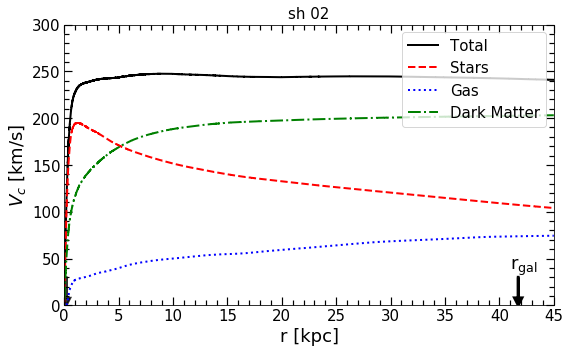

subhalo 127000000000003


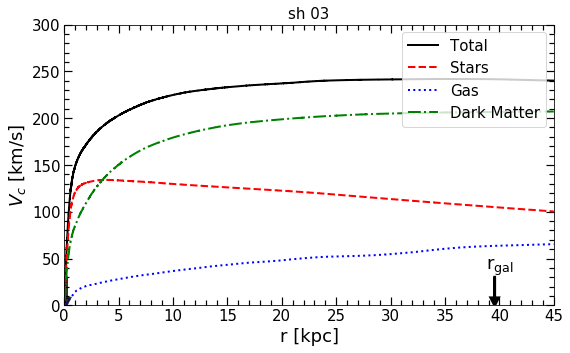

subhalo 127000000000004


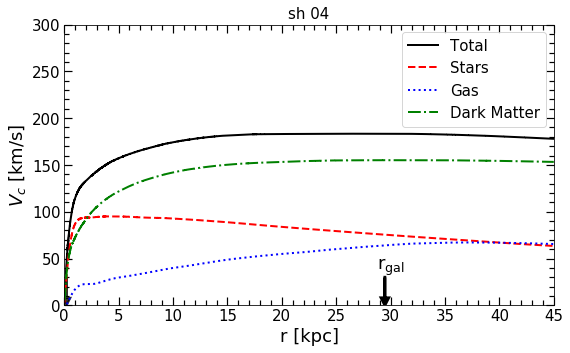

subhalo 127000000000006


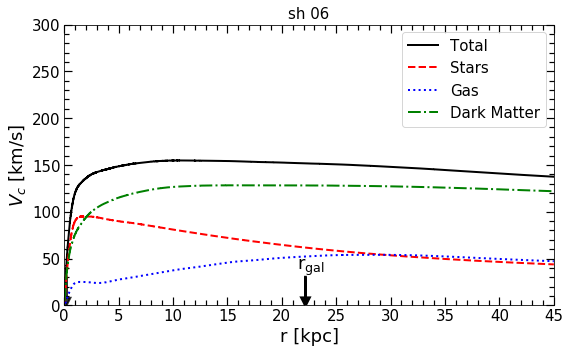

subhalo 127000000000007


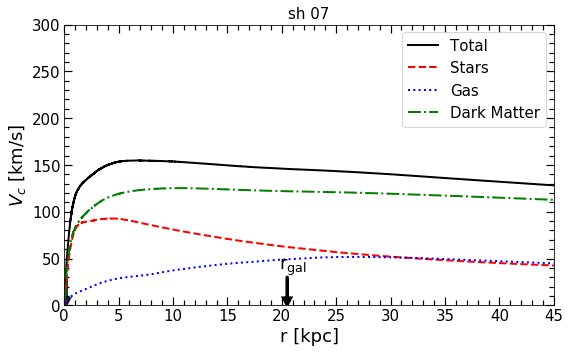

subhalo 127000000000009


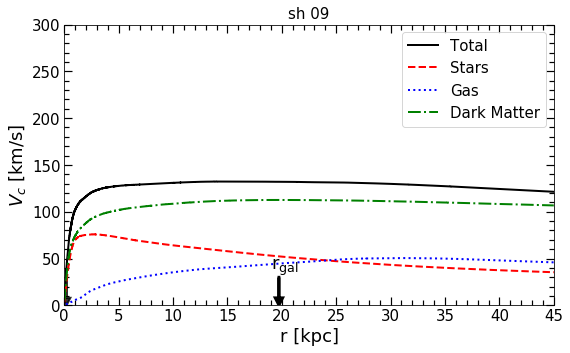

subhalo 127000000000012


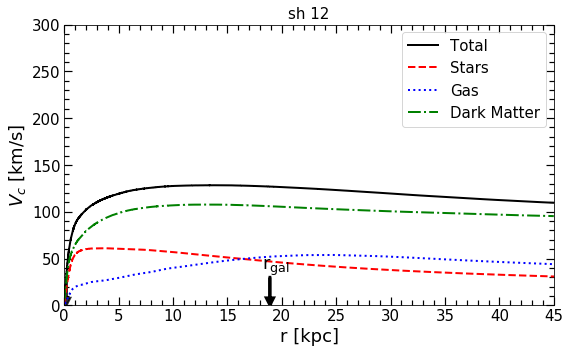

subhalo 127000000000011


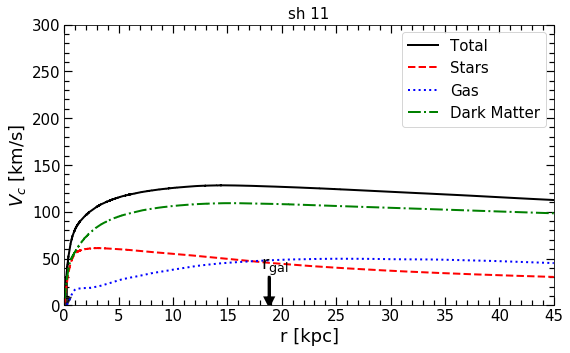

subhalo 127000000000014


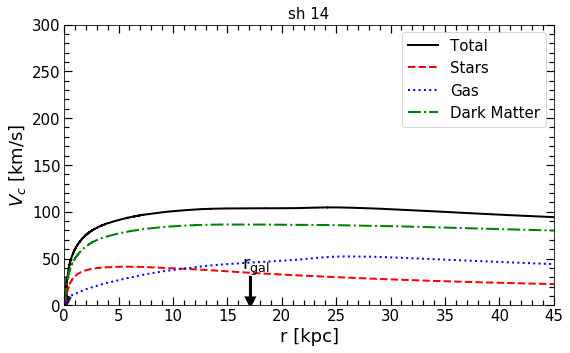

subhalo 127000000000020


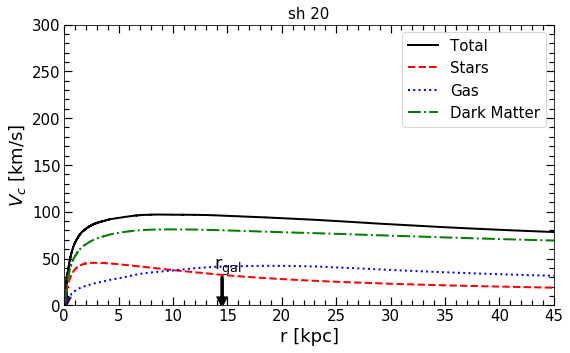

subhalo 127000000000021


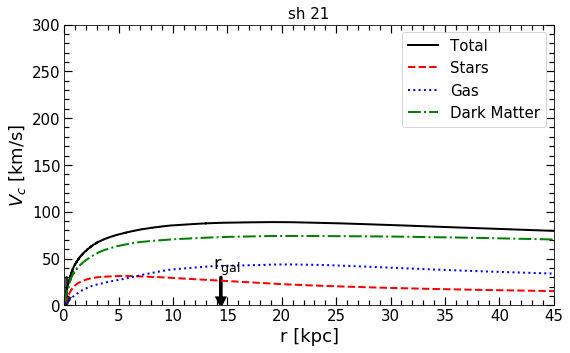

subhalo 127000000000023


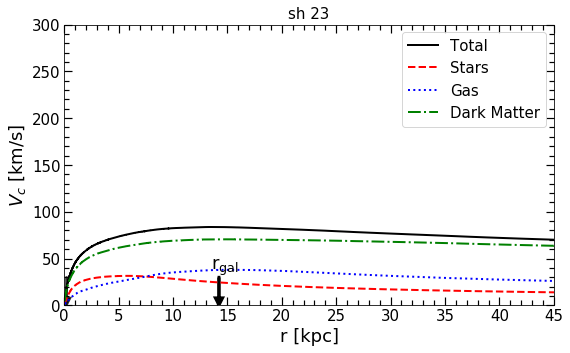

subhalo 127000000000028


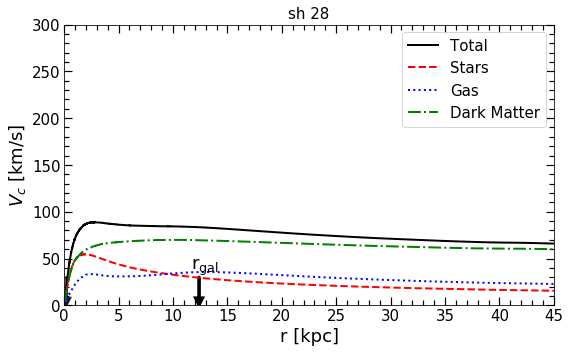

subhalo 127000000000031


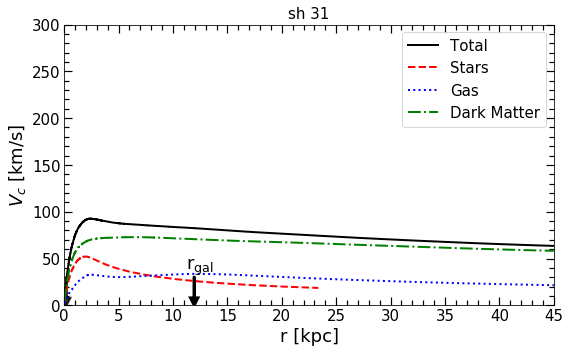

In [8]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc
import time_conversion as time
import random

G = 4.299e-6

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    print('subhalo '+ str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    sft  = snap['/Str/FormationTime'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    mgas = mgas*1e10/h
    mdrk = mdrk*1e10/h
    
    R200 = Rvir*aexp/h
    rgal = 0.15*R200

    limit_str   = np.where(rstr<R200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<R200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<R200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
    

    Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#--------------------------------------------------------------       
    rtot = np.concatenate([rstr, rgas, rdrk])
    mtot = np.concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<R200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------

    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
    
    # atot = np.sort(random.choices(np.arange(len(rtot_sort)),k=np.int_(len(rtot_sort)*0.01))) 
    # adrk = np.sort(random.choices(np.arange(len(rdrk_sort)),k=np.int_(len(rdrk_sort)*0.01)))
    # astr = np.sort(random.choices(np.arange(len(rstr_sort)),k=np.int_(len(rstr_sort)*0.01)))
    # agas = np.sort(random.choices(np.arange(len(rgas_sort)),k=np.int_(len(rgas_sort)*0.01)))
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    ax.plot(rtot_sort, Vtot, '-',  lw=2, color='k', label= 'Total')
    ax.plot(rstr_sort, Vstr, '--', lw=2, color='r', label='Stars')
    ax.plot(rgas_sort, Vgas, ':',  lw=2, color='b', label='Gas')
    ax.plot(rdrk_sort, Vdrk, '-.', lw=2, color='g', label='Dark Matter')
    ax.arrow(x=rgal,y=30,dx=0,dy=-30,color='k', lw=2.8,
             head_length=8,head_width=0.7,length_includes_head=True)
    ax.text(rgal+0.5, 30,  '$\mathrm{r_{gal}}$',  fontsize=18, color='black',
            ha='center', va='bottom')
    
    ax.set_ylim(0,300)
    ax.set_xlim(0,45)
    ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=18)
    ax.set_xlabel('r [kpc]', fontsize=18)
    ax.set_title('sh '+Id,fontsize=15)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True, top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True, top=True)
    ax.legend(fontsize=15,loc=1, fancybox=True)
    ax.arrow(0.22,30,0,-30,
        length_includes_head=True, head_width=0.7, head_length=8,
        lw=2,color='k',alpha=0.8)

    plt.show()
    
    fig.savefig('../_imagenes/velocities/Vcirc_sh_'+str('%d'%ID[j])+'.png', 
                dpi = 100, xxbox_inches='tight')

    gc.collect()
#----------------------------------------------------------------------------------
#     data_tot = np.zeros([np.size(rtot_sort[atot]),3])
#     data_tot[:,0]= rtot_sort[atot]
#     data_tot[:,1]= Vtot[atot]
#     data_tot[:,2]= Mc_tot[atot]

#     data_str = np.zeros([np.size(rstr_sort[astr]),3])
#     data_str[:,0]= rstr_sort[astr]
#     data_str[:,1]= Vstr[astr]
#     data_str[:,2]= Mc_str[astr]

#     data_gas = np.zeros([np.size(rgas_sort[agas]),3])
#     data_gas[:,0]= rgas_sort[agas]
#     data_gas[:,1]= Vgas[agas]
#     data_gas[:,2]= Mc_gas[agas]

#     data_drk = np.zeros([np.size(rdrk_sort[adrk]),3])
#     data_drk[:,0]= rdrk_sort[adrk]
#     data_drk[:,1]= Vdrk[adrk]
#     data_drk[:,2]= Mc_drk[adrk]

#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vtot.dat', data_tot)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vstr.dat', data_str)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vgas.dat', data_gas)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vdrk.dat', data_drk)

## Vcirc normalizado a rgal

subhalo 127000000000002


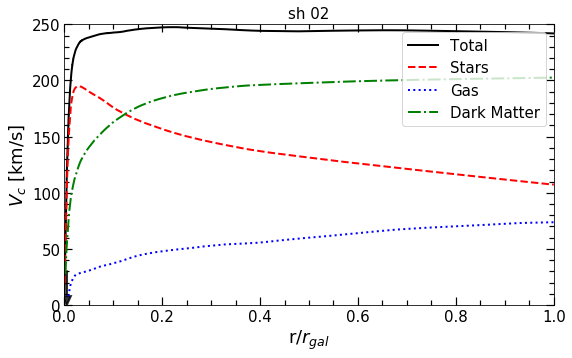

subhalo 127000000000003


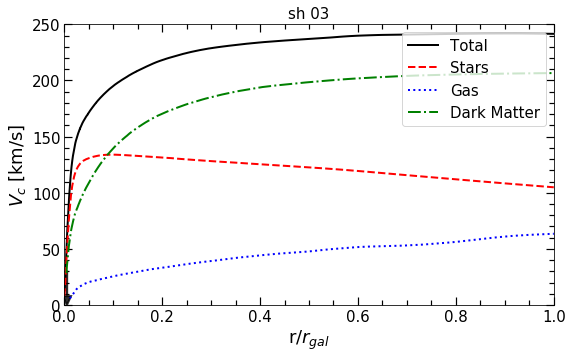

subhalo 127000000000004


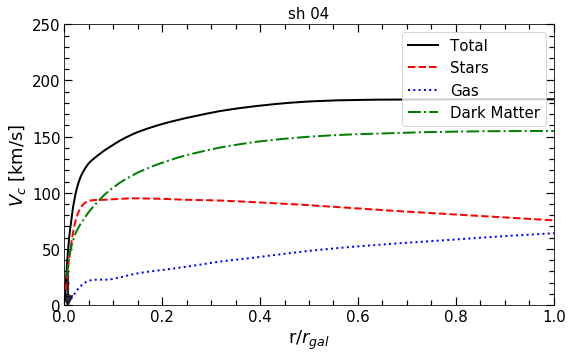

subhalo 127000000000006


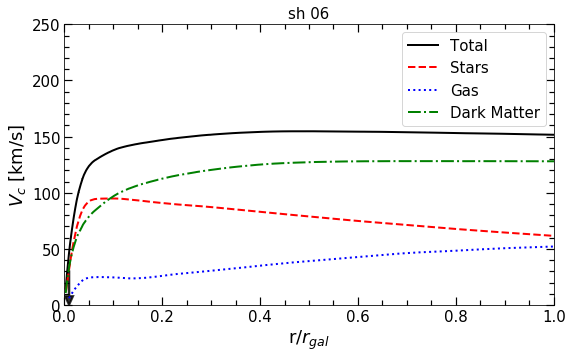

subhalo 127000000000007


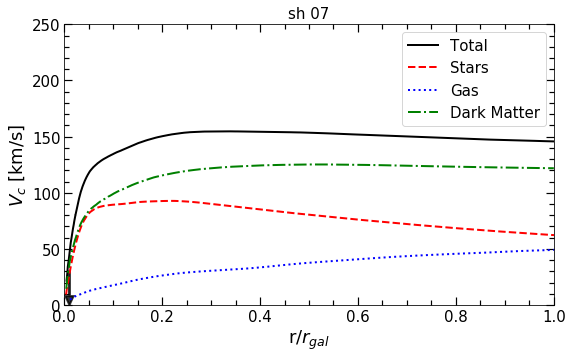

subhalo 127000000000009


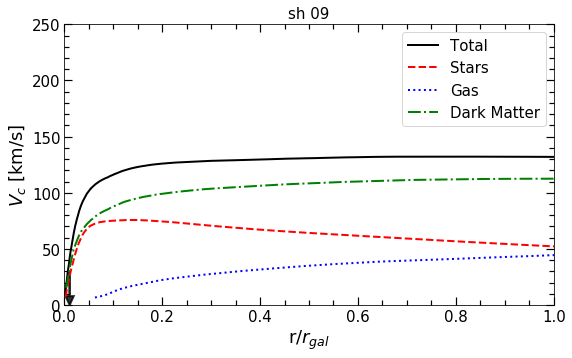

subhalo 127000000000012


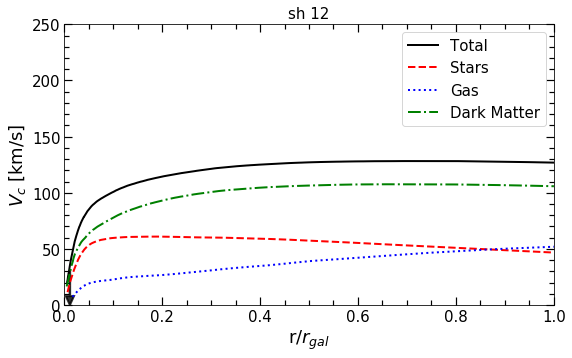

subhalo 127000000000011


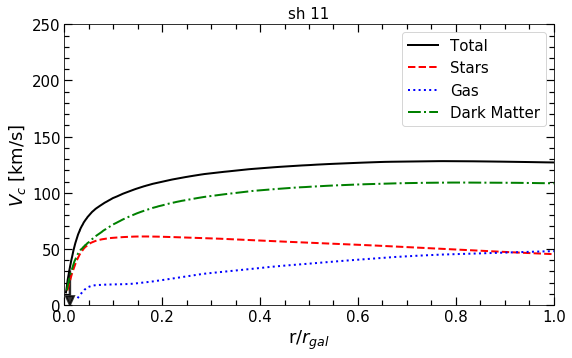

subhalo 127000000000014


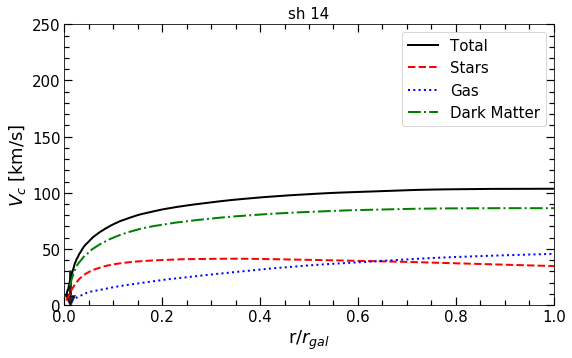

subhalo 127000000000020


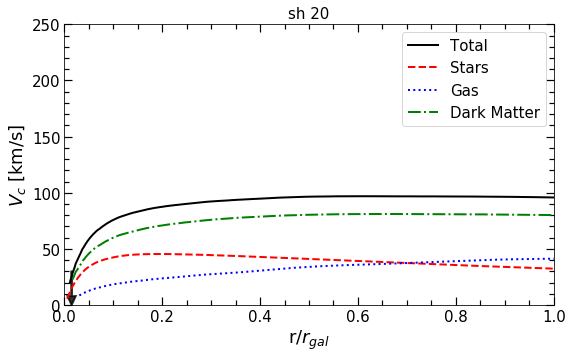

subhalo 127000000000021


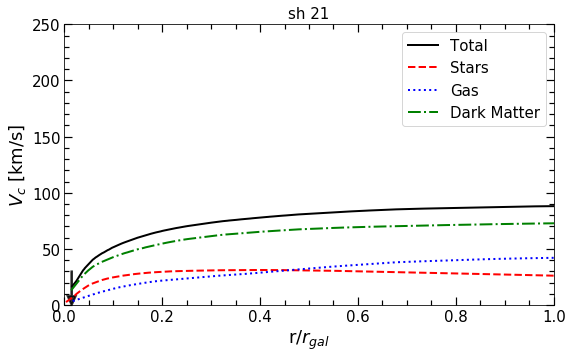

subhalo 127000000000023


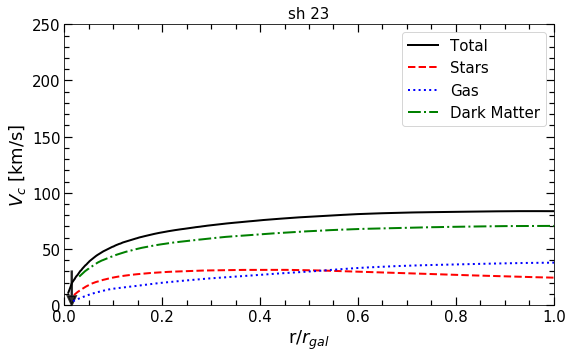

subhalo 127000000000028


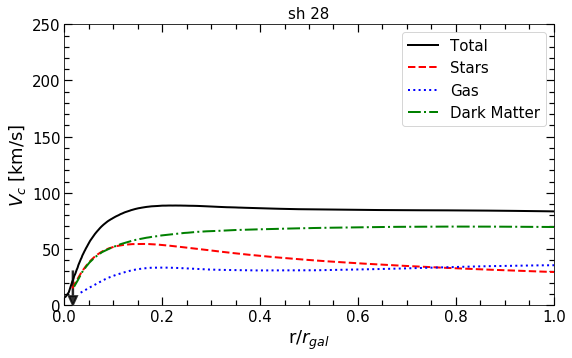

subhalo 127000000000031


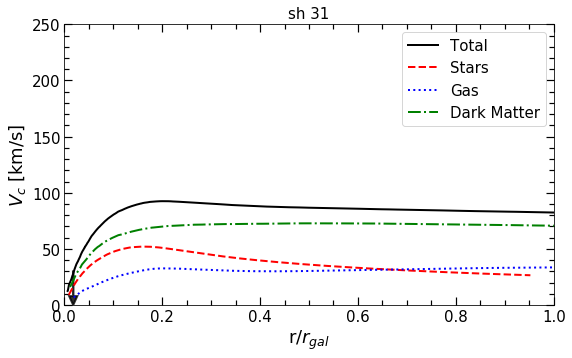

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc
import time_conversion as time
import random

G = 4.299e-6

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    print('subhalo '+ str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    sft  = snap['/Str/FormationTime'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    mgas = mgas*1e10/h
    mdrk = mdrk*1e10/h
    
    R200 = Rvir*aexp/h
    rgal = 0.15*R200

    limit_str   = np.where(rstr<R200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<R200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<R200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
    

    Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#--------------------------------------------------------------       
    rtot = np.concatenate([rstr, rgas, rdrk])
    mtot = np.concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<R200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------

    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
    
    atot = np.sort(random.choices(np.arange(len(rtot_sort)),k=np.int_(len(rtot_sort)*0.01))) 
    adrk = np.sort(random.choices(np.arange(len(rdrk_sort)),k=np.int_(len(rdrk_sort)*0.01)))
    astr = np.sort(random.choices(np.arange(len(rstr_sort)),k=np.int_(len(rstr_sort)*0.01)))
    agas = np.sort(random.choices(np.arange(len(rgas_sort)),k=np.int_(len(rgas_sort)*0.01)))
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    ax.plot(rtot_sort[atot]/rgal, Vtot[atot], '-',  lw=2, color='k', label= 'Total')
    ax.plot(rstr_sort[astr]/rgal, Vstr[astr], '--', lw=2, color='r', label='Stars')
    ax.plot(rgas_sort[agas]/rgal, Vgas[agas], ':',  lw=2, color='b', label='Gas')
    ax.plot(rdrk_sort[adrk]/rgal, Vdrk[adrk], '-.', lw=2, color='g', label='Dark Matter')
    # ax.arrow(x=rgal,y=30,dx=0,dy=-30,color='k', lw=2.8,
    #          head_length=8,head_width=0.7,length_includes_head=True)
    # ax.text(rgal+0.5, 30,  '$\mathrm{r_{gal}}$',  fontsize=18, color='black',
    #         ha='center', va='bottom')
    
    ax.set_ylim(0,250)
    ax.set_xlim(0,1)
    ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=18)
    ax.set_xlabel('r/$r_{gal}$', fontsize=18)
    ax.set_title('sh '+Id,fontsize=15)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True, top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True, top=True)
    ax.legend(fontsize=15,loc=1, fancybox=True)
    ax.arrow(0.22/rgal,30,0,-30,
        length_includes_head=True, head_width=1/60, head_length=8,
        lw=2,color='k',alpha=0.8)

    plt.show()
    
    fig.savefig('../_imagenes/velocities/Vcirc_sh_n_'+str('%d'%ID[j])+'.png', 
                dpi = 100, xxbox_inches='tight')

    gc.collect()
#----------------------------------------------------------------------------------
#     data_tot = np.zeros([np.size(rtot_sort[atot]),3])
#     data_tot[:,0]= rtot_sort[atot]
#     data_tot[:,1]= Vtot[atot]
#     data_tot[:,2]= Mc_tot[atot]

#     data_str = np.zeros([np.size(rstr_sort[astr]),3])
#     data_str[:,0]= rstr_sort[astr]
#     data_str[:,1]= Vstr[astr]
#     data_str[:,2]= Mc_str[astr]

#     data_gas = np.zeros([np.size(rgas_sort[agas]),3])
#     data_gas[:,0]= rgas_sort[agas]
#     data_gas[:,1]= Vgas[agas]
#     data_gas[:,2]= Mc_gas[agas]

#     data_drk = np.zeros([np.size(rdrk_sort[adrk]),3])
#     data_drk[:,0]= rdrk_sort[adrk]
#     data_drk[:,1]= Vdrk[adrk]
#     data_drk[:,2]= Mc_drk[adrk]

#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vtot.dat', data_tot)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vstr.dat', data_str)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vgas.dat', data_gas)
#     np.savetxt('../_data/velocity/sh_'+str('%d'%ID[j])+'_Vdrk.dat', data_drk)

### Graficamos con los datos guardados

In [3]:
%time
import gc
import numpy as np

SubH_000  = np.loadtxt('../_data/velocity/sh_000_Vtot.dat')
rtot_subh000 = SubH_000[:,0]
Vtot_subh000 = SubH_000[:,1]
Mtot_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/velocity/sh_000_Vstr.dat')
rstr_subh000 = SubH_000[:,0]
Vstr_subh000 = SubH_000[:,1]
Mstr_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/velocity/sh_000_Vgas.dat')
rgas_subh000 = SubH_000[:,0]
Vgas_subh000 = SubH_000[:,1]
Mgas_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/velocity/sh_000_Vdrk.dat')
rdrk_subh000 = SubH_000[:,0]
Vdrk_subh000 = SubH_000[:,1]
Mdrk_subh000 = SubH_000[:,2]

gc.collect()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs


0

In [4]:
len(rstr_subh000)

57181

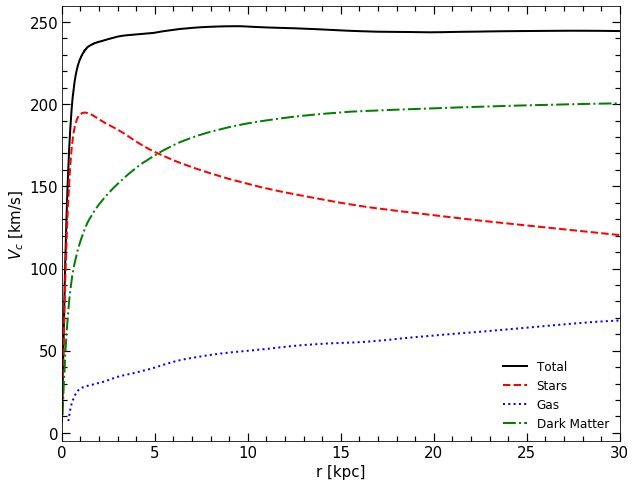

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
# fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax.plot(rtot_subh000, Vtot_subh000, '-',  lw=2, color='k', label= 'Total')
ax.plot(rstr_subh000, Vstr_subh000, '--', lw=2, color='r', label='Stars')
ax.plot(rgas_subh000, Vgas_subh000, ':',  lw=2, color='b', label='Gas')
ax.plot(rdrk_subh000, Vdrk_subh000, '-.', lw=2, color='g', label='Dark Matter')
# ax[0,0].set_ylim(0,15)
ax.set_xlim(0,30)
ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=15)
ax.set_xlabel('r [kpc]', fontsize=15)
# ax[0,0].set_xticks([0,5,10,15,20,25,30])
# ax[0,0].set_yticks([50,100,150,200])
# ax.set_xticklabels([])
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax.legend(frameon=False ,fontsize=12)

plt.show()


### Circular velocity over time


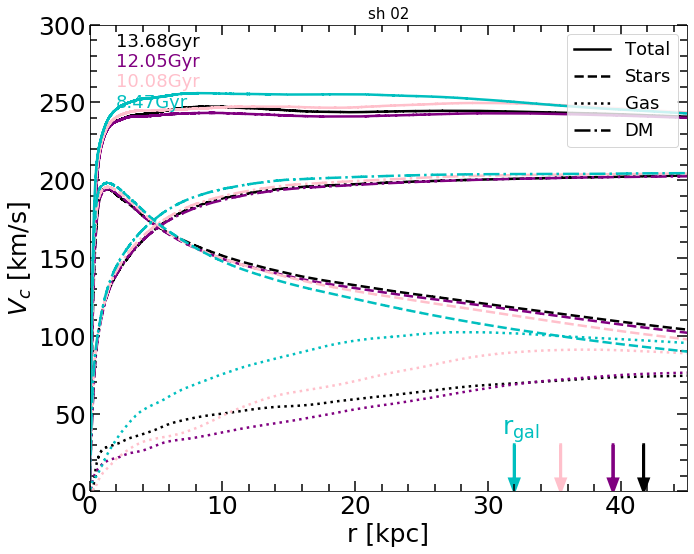

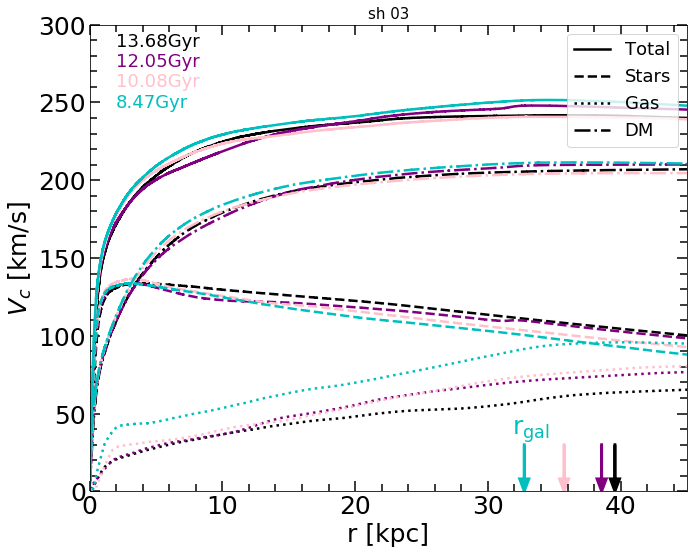

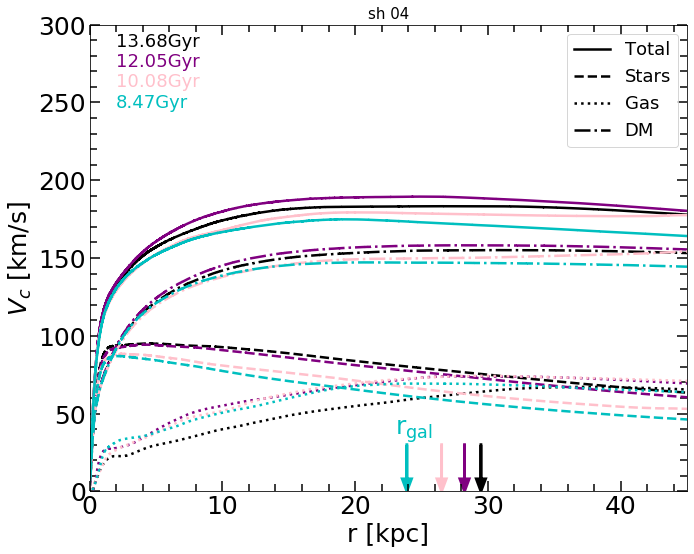

In [15]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc
import time_conversion as time
import random

G = 4.299e-6

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/'

snapshots=(127,117,105,95)
colors= ('k','purple','pink','c')

for i in range(3):
    
    Id = ''
    for aux in list(str('%d'%ID[i]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))# sharey=True, sharex=True)
    #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.12, left =0.15, right = 0.98, top = 0.93, wspace=0., hspace= 0)
        
    for j in range(len(snapshots)):
        
        path = '/store/erebos/omarioni/_simulations/snap_'+str('%03d'%snapshots[j])
            
        snap = h5py.File(path + '/subhalo_'+str('%d'%ID[i])+'.h5py', 'r')

        aexp = snap['/Time'][()]
        h    = snap['/h'][()]
        Om_L = snap['/Omega_Lambda'][()]
        Om_M = snap['/Omega_0'][()]
        Rvir = snap['/R200'][()]

        pstr = snap['/Str/Coordinates'][()]
        mstr = snap['/Str/Masses'][()]
        vstr = snap['/Str/Velocities'][()]
        sft  = snap['/Str/FormationTime'][()]

        pgas = snap['/Gas/Coordinates'][()]
        mgas = snap['/Gas/Masses'][()]

        pdrk = snap['/Drk/Coordinates'][()]
        mdrk = snap['/Drk/Masses'][()]

        amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
        ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
        age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
        
        tiempo = time.conv2(aexp, h, Om_L, Om_M)

        #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = pstr[amask,0]*aexp/h
        ystr = pstr[amask,1]*aexp/h
        zstr = pstr[amask,2]*aexp/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = pgas[:,0]*aexp/h
        ygas = pgas[:,1]*aexp/h
        zgas = pgas[:,2]*aexp/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = pdrk[:,0]*aexp/h
        ydrk = pdrk[:,1]*aexp/h
        zdrk = pdrk[:,2]*aexp/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

        #----------------------masas----------------------------
        mstr = mstr[amask]*1e10/h
        mgas = mgas*1e10/h
        mdrk = mdrk*1e10/h

        R200 = Rvir*aexp/h
        rgal = 0.15*R200

        limit_str   = np.where(rstr<R200)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])

        limit_gas   = np.where(rgas<R200)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        limit_drk   = np.where(rdrk<R200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])


        Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

        Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

        Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

    #--------------------------------------------------------------       
        rtot = np.concatenate([rstr, rgas, rdrk])
        mtot = np.concatenate([mstr, mgas, mdrk])

        limit_tot   = np.where(rtot<R200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])

        Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

        #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
    #--------------------------------------------------------------

        Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
        Vstr = np.sqrt((G*Mc_str)/rstr_sort)
        Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
        Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)


        ax.plot(rtot_sort, Vtot, ls='-',  lw=2.5, color=colors[j])
        ax.plot(rstr_sort, Vstr, ls='--', lw=2.5, color=colors[j])
        ax.plot(rgas_sort, Vgas, ls=':',  lw=2.5, color=colors[j])
        ax.plot(rdrk_sort, Vdrk, ls='-.', lw=2.5, color=colors[j])
         
        ax.text(2, 295-j*13,  str('%2.2f'%tiempo)+'Gyr',  fontsize=18, color=colors[j],ha='left', va='top')
        
        ax.arrow(x=rgal,y=30,dx=0,dy=-30,color=colors[j], lw=2.8,
                 head_length=8,head_width=0.7,length_includes_head=True)
    ax.text(rgal+0.5, 30,  '$\mathrm{r_{gal}}$',  fontsize=25, color=colors[j],
            ha='center', va='bottom')
    ax.plot((-1,-5),(-1,-5),ls='-',  lw=2.5, color='k', label= 'Total')
    ax.plot((-1,-5),(-1,-5),ls='--',  lw=2.5, color='k', label= 'Stars')
    ax.plot((-1,-5),(-1,-5),ls=':',  lw=2.5, color='k', label= 'Gas')
    ax.plot((-1,-5),(-1,-5),ls='-.',  lw=2.5, color='k', label= 'DM')
    ax.set_ylim(0,300)
    ax.set_xlim(0,45)
    ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=25)
    ax.set_xlabel('r [kpc]', fontsize=25)
    ax.set_title('sh '+Id,fontsize=15)
    ax.minorticks_on()
    ax.tick_params( labelsize=25)
    ax.tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True, top=True)
    ax.tick_params('both', length=10, width=1.5,which='major', direction='in', right=True, top=True)
    ax.legend(fontsize=18,loc=1, fancybox=True)
    # ax.arrow(0.22,30,0,-30,
    #     length_includes_head=True, head_width=0.7, head_length=8,
    #     lw=2,color='k',alpha=0.8)

    plt.show()

    fig.savefig('../_imagenes/Vcirc_time_sh_'+str('%d'%ID[j])+'.png', 
                dpi = 100, xxbox_inches='tight')

    gc.collect()
